Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import models
from keras import layers
import pathlib 
from pathlib import Path
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
directory = Path('/content/gdrive/MyDrive/Colab Notebooks/Deep Learning Practice/DL Assignments/datasets/flowers')
flowers = []
features = []
labels = []
# Iterating Over Directory To Extract Sub Directories
for dir in directory.iterdir():
  flowers.append(dir.name)
  print(dir.name)
# Iterating Over Sub Directories To Extract Lables
  for imgpath in dir.iterdir():
    if imgpath.name.endswith("jpg"):
      labels.append(dir.name)
      img_arr = cv2.imread(str(imgpath), cv2.IMREAD_GRAYSCALE)
      img_arr = cv2.resize(img_arr, (150,150))
      features.append(img_arr)

dandelion
tulip
daisy
rose
sunflower


In [50]:
samples = np.array(features)
print(samples.shape)
t_labels = np.array(labels)
print(t_labels.shape)

(4323, 150, 150)
(4323,)


In [51]:
print(samples[0])
print(t_labels[0])

[[255 254 254 ... 254 255 254]
 [253 255 253 ... 255 254 255]
 [255 253 255 ... 255 255 254]
 ...
 [255 253 255 ... 255 254 254]
 [254 255 255 ... 253 255 253]
 [254 255 255 ... 254 252 254]]
dandelion


In [52]:
Labels = pd.Series(t_labels, index=range(0, 4323))
Labels.value_counts()

dandelion    1052
tulip         984
rose          784
daisy         769
sunflower     734
dtype: int64

In [53]:
samples = samples.reshape(4323, 150*150)
samples  = samples.astype('float32')/255
print(samples[0])

[1.         0.99607843 0.99607843 ... 0.99607843 0.9882353  0.99607843]


In [54]:
replace_values = {'dandelion':0, 'tulip':1, 'rose':2, 'daisy':3, 'sunflower':4}
Labels = Labels.replace(replace_values)
Labels

0       0
1       0
2       0
3       0
4       0
       ..
4318    4
4319    4
4320    4
4321    4
4322    4
Length: 4323, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

s_train, s_test, l_train, l_test = train_test_split(samples, Labels, test_size=0.4, random_state=0)

In [56]:
s_train.shape

(2593, 22500)

In [57]:
l_train.shape

(2593,)

In [58]:
from keras.utils import to_categorical

l_train = to_categorical(l_train)
l_test = to_categorical(l_test)

l_train.shape

(2593, 5)

In [59]:
l_train

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [65]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(512, activation='relu', input_shape=(150*150,)))
  #model.add(layers.Dense(400, activation='relu'))
  model.add(layers.Dense(100, activation='relu'))
  model.add(layers.Dropout(0.5, noise_shape = None, seed = None))
  #model.add(layers.Dense(20, activation='tanh'))
  model.add(layers.Dense(5, activation='softmax'))
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')
  return model

In [67]:
model8 = build_model()
history8 = model8.fit(s_train, l_train, epochs=20, batch_size=64)

Epoch 1/20
41/41 [==============================] - 6s 137ms/step - loss: 20.4230 - accuracy: 0.1930
Epoch 2/20
41/41 [==============================] - 6s 141ms/step - loss: 1.6087 - accuracy: 0.2342
Epoch 3/20
41/41 [==============================] - 6s 142ms/step - loss: 2.0711 - accuracy: 0.2350
Epoch 4/20
41/41 [==============================] - 6s 143ms/step - loss: 1.7441 - accuracy: 0.2337
Epoch 5/20
41/41 [==============================] - 6s 144ms/step - loss: 1.6050 - accuracy: 0.2381
Epoch 6/20
41/41 [==============================] - 6s 143ms/step - loss: 1.6048 - accuracy: 0.2232
Epoch 7/20
41/41 [==============================] - 6s 149ms/step - loss: 1.6020 - accuracy: 0.2390
Epoch 8/20
41/41 [==============================] - 6s 137ms/step - loss: 1.6023 - accuracy: 0.2279
Epoch 9/20
41/41 [==============================] - 6s 136ms/step - loss: 1.5985 - accuracy: 0.2461
Epoch 10/20
41/41 [==============================] - 6s 143ms/step - loss: 1.6005 - accuracy: 0.245

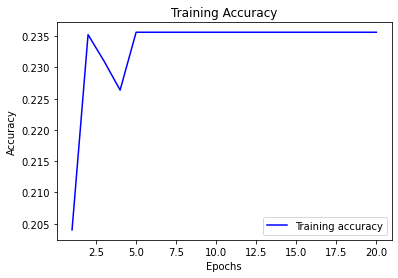

In [68]:
acc = history8.history['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [69]:
loss, accuracy = model8.evaluate(s_test, l_test)
prediction = accuracy*100
print('Prediction Accuracy =', prediction,'%')

55/55 [==============================] - 1s 21ms/step - loss: 1.5972 - accuracy: 0.2549
Prediction Accuracy = 25.49133002758026 %
